# Monty Hall Problem
## Motivierendes Beispiel
Der erste Teil des Codes bis zur Erklärung mit dem Satz von Bayes ist eine modifizierte Version des Codes von J. Mora [1]. 

Das Monty Hall Problem lautet folgendermaßen:

"Nehmen Sie an, Sie wären in einer Spielshow [names Monty Hall] und hätten die Wahl zwischen drei Toren. Hinter einem der Tore ist ein Auto, hinter den anderen sind Ziegen. Sie wählen ein Tor, sagen wir, Tor Nummer 1, und der Showmaster [names Monty], der weiß, was hinter den Toren ist, öffnet ein anderes Tor, sagen wir, Nummer 3, hinter dem eine Ziege steht. Er fragt Sie nun: ‚Möchten Sie das Tor Nummer 2?‘ Ist es von Vorteil, die Wahl des Tores zu ändern?" [2]. 

Wir wollen das Problem aus der Beschreibung zunächst simulieren, um ein Indiz zu bekommen, ob das Wechseln des Tores einen Vorteil für den Kandidaten bringt.

Zunächst werden die notwendigen Bibliotheken zum Ausführen des Codes dieses Notebooks importiert. Falls eine der Bibliotheken nicht auf ihrem System vorhanden sind können Sie diese mit pip und der beiliegenden Datei [requirements.txt](./requirements.txt). Wie sie beispielsweise die benötigten Bibliotheken mit pip installieren wird [auf dieser Seite](https://note.nkmk.me/en/python-pip-install-requirements/) erklärt. 

In [2]:
import random
import matplotlib.pyplot as plt
import scipy.special

In [2]:
random.seed(42)

In der folgenden Funktion wählt Monty (der Moderator) ein Ziegentor aus, welches nicht vom Kandidaten gewählt wurde. 

In [3]:
# Monty is choosing a door that has a goat after the contestant has chosen one
def montyChoose(guessDoor, prizeDoor): 
    if 1 != guessDoor and 1 != prizeDoor:
        return 1
    if 2 != guessDoor and 2 != prizeDoor:
        return 2
    return 3

Anschließend folgt eine Funktion, welche das Problem simuliert. Hierbei wird die Anzahl der Simulationen eingegeben und die Ausgänge zugegeben. Mögliche Ausgänge sind, dass der Kandidat durch wechseln oder nicht wechseln gewinnt, was im Code durch *switchWins* und *noSwitchWins* dargestellt wird. 

In [4]:
def simMontyHall(numTrials):
    '''
    Parameters:
        numTrials (int): 
            How many games should be played?
    
    Returns:
        noSwitchWins (int): 
            number of times the candidate wins by not switching
        switchWins (int):
            number of times the candidate wins by switching
    '''
    noSwitchWins, switchWins = (0, 0)

    for t in range(numTrials):
        # select random doors for the prize and the guess of the candidate
        prizeDoor = random.choice([1, 2, 3])
        guess = random.choice([1, 2, 3])
        if guess == prizeDoor:
            noSwitchWins += 1
        else:
            switchWins += 1
    return (noSwitchWins, switchWins)

Zuletzt wird hier noch eine Funktion definiert, welche die Ausgänge des Experimentes als Kuchendiagramm anzeigt. 

In [5]:
def displayMHSim(simResults, title):
    stickWins, switchWins = simResults
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.pie([stickWins, switchWins],
              colors = ["red", "lightskyblue"],
              labels = ["Not Switching", "Switching"],
              autopct = "%.1f%%",
              shadow = False,
              startangle = 90)
    plt.title(title)

Nun führen wir das Experiment mit 100000 Durchläufen aus. Fühlen Sie sich frei die Anzahl der Durchläufe zu verändern. 

No Switch Wins: 33456/100000, Switch Wins: 66544/100000


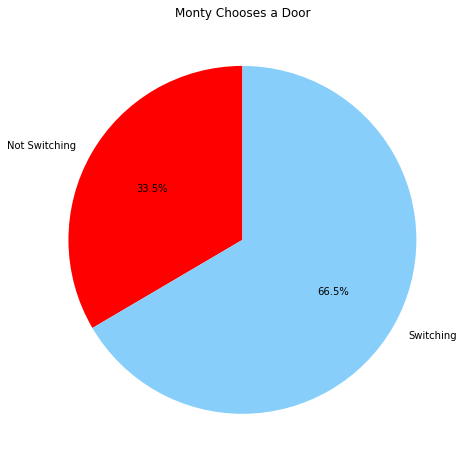

In [6]:
numTrials = 100000
simResults = simMontyHall(numTrials=numTrials)
print("No Switch Wins: {0}/{2}, Switch Wins: {1}/{2}".format(simResults[0], simResults[1], numTrials))
displayMHSim(simResults, "Monty Chooses a Door")
plt.show()

## Erklärung mit dem Satz von Bayes
Im Folgenden wird eine Erklärung der Ergebnisse mit Hilfe des Satz von Bayes gegeben. Durch den Satz von Bayes können wir die Wahrscheinlichkeit $Pr(A_i \vert B) = \frac{Pr(B \vert A_i) \cdot Pr(A_i)}{Pr(B)}$ berechnen. 
Zwar bietet der folgende Text eine Erklärung mit 3 Toren, jedoch können Sie gerne die Anzahl der Tore im Code-Beispiel erhöhen.  

Durch die Problembeschreibung wissen wir, dass es 3 Tore gibt, welche wir mit $1$, $2$ und $3$ betiteln.
Sei $P=x, x \in \{1,2,3\}$ das Ereignis, dass sich der Preis hinter dem Tor x befindet. 
Sei $M=x$ das Ereignis des Aufdeckens eines Tores durch Monty. 

In [3]:
# please use at least three doors
numDoors = 3

if numDoors < 3:
    numDoors = 3

# for example 1, 2, 3, ..., numDoors
doors = list(range(1, numDoors + 1))
print("We have the following doors:", doors)

We have the following doors: [1, 2, 3]


Wir betrachten nun $M=2$ und nehmen dabei an, dass sich der Preis hinter dem Tor $1$ oder $3$ befindet. Wir wissen das hinter Tor $2$ kein Preis ist, da Monty immer ein Ziegentor aufdeckt. Des Weiteren wird davon ausgegangen, dass der Kandidat das Tor $1$ gewählt hat.

In [4]:
# door which is chosen by the candidate
guess = 1
# door with the price
prize = 2

# in case of an invalid input
if guess < 0 or guess > numDoors:
    guess = 1
if prize < 0 or prize > numDoors or prize == guess:
    if guess == 1:
        prize = 2
    elif guess == numDoors:
        prize = numDoors - 1

# create a list of all doors that are opened by monty
monty = doors.copy()
monty.remove(guess)
monty.remove(prize)

print("The candidate chooses door {0} and the prize is behind door {1}.".format(guess, prize))
print("Monty will open all other doors -- in this case: {0}".format(monty))

The candidate chooses door 1 and the prize is behind door 2.
Monty will open all other doors -- in this case: [3]


Gesucht sind die Wahrscheinlichkeiten $Pr(P=1 \vert M=2)$ sowie $Pr(P=3 \vert M=2)$.
$Pr(P=1 \vert M=2)$ ist die Wahrscheinlichkeit dafür, dass der Preis hinter Tor $1$ steckt, wenn Monty das Ziegen-Tor $2$ aufdeckt hat. Nach der Auswertung von $Pr(P=1 \vert M=2)$ und $Pr(P=3 \vert M=2)$ kann der Kandidat sich für die höhere Wahrscheinlichkeit entscheiden. Zur Berechnung der Wahrscheinlichkeiten verwenden wir den oben aufgeführten Satz von Bayes, welcher in unserem Fall für $P=1$ wie folgt aussieht: $Pr(P=1 \vert M=2) = \frac{Pr(M=2 \vert P=1) \cdot Pr(P=1)}{Pr(M=2)}$.
Somit müssen wir $Pr(P=1)$ und $Pr(M=2 \vert P=1)$ im Fall $P=1$ berechnen.

Sei $Pr(P=1)$ die Wahrscheinlichkeit dafür, dass hinter Tor $1$ der Preis steckt und Monty noch kein Tor aufgedeckt hat. Der Preis könnte hinter jeder Tor sein, daher ergeben sich die Wahrscheinlichkeiten $Pr(P=1) = Pr(P=2) = Pr(P=3) = \frac{1}{3}$. Diese Wahrscheinlichkeit wird auch a priori Wahrscheinlichkeit genannt und ist im Code als *prior* bezeichnet. 

In [5]:
prior = 1 / numDoors
print("The probability of getting the prize if choosing any door is:", prior)

The probability of getting the prize if choosing any door is: 0.3333333333333333


Sei $Pr(M=2 \vert P=1)$ die Wahrscheinlichkeit dafür, dass Monty das Tor $2$ aufdeckt, wenn der Preis sich hinter Tor $1$ befindet. 
Für den Fall, dass sich der Preis hinter Tor $1$ befindet, öffnet Monty entweder Tor $2$ oder $3$. Wenn sich der Preis hinter Tor $3$ befindet, dann kann Monty nur das Tor $2$ wählen. Formal ausgedrückt bedeutet dies $Pr(M=2 \vert P=1) = \frac{1}{2}$ und $Pr(M=2 \vert P=3) = 1$. Im Englischen wird eine Wahrscheinlichkeit wie $Pr(M=2 \vert P=3)$ als *likelihood* Funktion bezeichnet. Daher werden im Code die *likehoods* für die Fälle $P=1$, $P=2$ und $P=3$ berechnet. 

Hierbei ist $Pr(M=2 \vert P=2) = 0$, da Monty das Tor $2$ nicht öffnet, wenn sich darunter der Preis befindet. 

In [6]:
# P(M=2, M=4, M=5, ..., M=n | P=1)
print("Recall that the candidate guessed door", guess)
print("Monty will open {0} door/s, namely: {1}\n".format(len(monty), monty))
likelihoods = []
# Consider all cases: P=1, P=2, ..., P=n
for prizeDoor in doors:
    # doors that could be opened by monty
    doorsOpenedMonty = doors.copy()
    likelihood = 0
    # if the considered prizeDoor is acutally a goat door
    if prizeDoor in monty:
        # than the likelihood of opening this door is 0 as monty does not show the prize
        doorsOpenedMonty = []
        print("The prize could be behind door {0} and monty will open this door -- Hence, the likelihood is 0"
              .format(prizeDoor))
    # if the considered prizeDoor is not a goat door
    else:
        print("The prize could be behind door", prizeDoor)
        # prize could be behind the guessed door
        doorsOpenedMonty.remove(guess)
        # in case that the prize is not behind the guessed door
        if prizeDoor == prize:
            # monty does not open the prize door
            doorsOpenedMonty.remove(prizeDoor)
    if len(doorsOpenedMonty) > 0:
        # number of doors that could be potentially opened by monty
        pot = len(doorsOpenedMonty)
        poss = scipy.special.binom(pot, len(monty))
        print(("Monty will open {0} door/s out of {1} available door/s\n" + 
              "Hence, there is/are {2} possibility/ies of choosing a/the door/s")
              .format(len(monty), len(doorsOpenedMonty), poss))
        likelihood = 1 / poss
        print("Monty only chooses 1 possibility. Therefore the likelihood is 1/{0}={1}\n".format(poss, likelihood))
    likelihoods.append(likelihood)

Recall that the candidate guessed door 1
Monty will open 1 door/s, namely: [3]

The prize could be behind door 1
Monty will open 1 door/s out of 2 available door/s
Hence, there is/are 2.0 possibility/ies of choosing a/the door/s
Monty only chooses 1 possibility. Therefore the likelihood is 1/2.0=0.5

The prize could be behind door 2
Monty will open 1 door/s out of 1 available door/s
Hence, there is/are 1.0 possibility/ies of choosing a/the door/s
Monty only chooses 1 possibility. Therefore the likelihood is 1/1.0=1.0

The prize could be behind door 3 and monty will open this door -- Hence, the likelihood is 0


### Aufgabe: Vereinfachung des obigen Code-Blocks
Versuchen Sie den obigen Codeblock mit $\leq 6$ Zeilen Code (ohne Kommentare und Ausgaben) umzusetzen. Speichern Sie die dabei die *likelihoods* in der Variable *mLikelihoods*. 

In [7]:
mLikelihoods = [0] * len(doors)

# helpful variables
guessIdx = guess - 1
prizeIdx = prize - 1
lMonty = len(monty)
lDoors = len(doors)

'''
Your solution here!!!
'''


'''
End of solution!!!
'''
if mLikelihoods == likelihoods:
    print("Well done!")
else: 
    print("Try again!")

Try again!


Im obigen Codeblock (nicht Aufgabe) wurde der Binomialkoeffizient verwendet (siehe Zeile *poss = scipy.special.binom(pot, len(monty))*). Im Fall von $Pr(M=2 \vert P=1) = \frac{1}{2}$ steht die $2$ im Nenner, da dies die Anzahl der Möglichkeiten darstellt aus $2$ verfügbaren Toren $1$ Tor zu wählen. Somit wird der Binomialkoeffizient ${2 \choose 1} = 2$ angewendet. Im Fall der Wahl von $98$ Toren aus $99$ verfügbaren Toren ergibt sich der Koeffizient ${99 \choose 98} = 99$, sprich die Anzahl an Möglichkeiten $98$ Tore von $99$ vorhanden Toren zu wählen.

Mit Hilfe der totalen Wahrscheinlichkeit muss noch die Konstante $Pr(M=2)$ berechnet werden. $Pr(M=2)$ ist die Wahrscheinlichkeit dafür, dass Monty das Tor $2$ öffnet. Des Weiteren gilt hier der betrachtete Fall, dass sich hinter Tor $1$ oder $3$ der Preis befindet.

Hierbei ist die totale Wahrscheinlichkeit $Pr(M=2) = Pr(M=2 \vert P=1) \cdot Pr(P=1) + Pr(M=2 \vert P=2) \cdot Pr(P=2) +  Pr(M=2 \vert P=3) \cdot Pr(P=3) = \frac{1}{2} \cdot \frac{1}{3} + 0 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} = \frac{1}{6} + \frac{1}{3} = \frac{1}{2}$.

In [7]:
marginalLikelihood = prior * sum(likelihoods)
print(marginalLikelihood)

0.11111111111111112


Da für alle Tore die a priori Wahrscheinlichkeit $Pr(P=x) = \frac{1}{\vert \{1, 2, 3\} \vert} = \frac{1}{3}$ ist, kann im Code die totale Wahrscheinlichkeit $Pr(M=2)$ folgendermaßen berechnet werden: $Pr(M=2) = \frac{1}{3} \cdot \sum^{\{1, 2, 3\}}_{i=1} Pr(M=2 \vert P=i)$. Darüberhinaus wird die totale Wahrscheinlichkeit im Englischen auch als *marginal likelihood* bezeichnet. 

Somit ergeben sich letztendlich für die a posteriori Wahrscheinlichkeiten $Pr(P=1 \vert M=2) = \frac{Pr(M=2 \vert P=1) \cdot Pr(P=1)}{Pr(M=2)} = \frac{\frac{1}{6}}{\frac{1}{2}} = \frac{1}{3}$ und für $Pr(P=3 \vert M=2) = \frac{Pr(M=2 \vert P=3) \cdot Pr(P=3)}{Pr(M=2)} = \frac{\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}$. 

0.09999999999999999
0.9


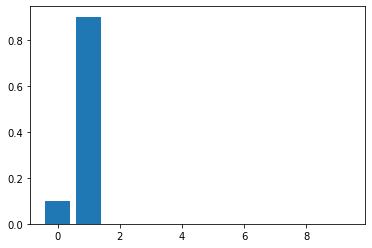

In [8]:
posteriors = []
for likelihood in likelihoods:
    posterior = (likelihood * prior) / marginalLikelihood
    posteriors.append(posterior)
    if posterior != 0:
        print(posterior)

plt.bar(range(len(posteriors)), posteriors)
plt.show()

Somit ist es für den Kandidaten besser das Tor zu wechseln. 

# Quellen
[1] The Monty Hall Problem, J. Mora, URL: https://jvmora.wordpress.com/2018/05/29/the-monty-hall-problem/ (Zugegriffen am 01.09.2020)

[2] Ask Marilyn, Craig F. Whitaker, In: Parade Magazine, 9. September 1990, S. 16